In [1]:
import sys
import os
import pandas as pd

# Añadir el directorio raíz del proyecto al PYTHONPATH
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(project_root)

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import quantstats as qs

In [2]:
BTC_ORIGINAL_RET = pd.read_parquet(r'C:\Users\adelapuente\Desktop\math_tfm\04_validation\BTC_original_returns.parquet')
BTC_VOLUME_RET = pd.read_parquet(r'C:\Users\adelapuente\Desktop\math_tfm\04_validation\BTC_volume_returns.parquet')
BTC_DOLLAR_RET = pd.read_parquet(r'C:\Users\adelapuente\Desktop\math_tfm\04_validation\BTC_dollar_returns.parquet')

SPY_ORIGINAL_RET = pd.read_parquet(r'C:\Users\adelapuente\Desktop\math_tfm\04_validation\SPY_original_returns.parquet')
SPY_VOLUME_RET = pd.read_parquet(r'C:\Users\adelapuente\Desktop\math_tfm\04_validation\SPY_volume_returns.parquet')
SPY_DOLLAR_RET = pd.read_parquet(r'C:\Users\adelapuente\Desktop\math_tfm\04_validation\SPY_dollar_returns.parquet')

BTC_ORIGINAL_RET.set_index('date', inplace=True)
BTC_VOLUME_RET.set_index('date', inplace=True)
BTC_DOLLAR_RET.set_index('date', inplace=True)

SPY_ORIGINAL_RET.set_index('date', inplace=True)
SPY_VOLUME_RET.set_index('date', inplace=True)
SPY_DOLLAR_RET.set_index('date', inplace=True)

In [9]:
BTC_VOLUME_RET['predicted_actions'].value_counts()

predicted_actions
 0    7310
-1    2798
 1    1506
Name: count, dtype: int64

In [10]:

qs.reports.html(returns = BTC_ORIGINAL_RET['BTC_real_actions_returns'], benchmark=BTC_ORIGINAL_RET['BTC Buy&Hold'], title= "BTC PPO Strategy VS Buy&Hold", output="BTC_original_vs_buy&hold.html")

In [18]:

qs.reports.html(returns = BTC_VOLUME_RET['BTC_real_actions_returns'], benchmark=BTC_VOLUME_RET['BTC Buy&Hold'], title= "BTC Volume PPO Strategy VS Buy&Hold", output="BTC_volume_vs_buy&hold.html")

In [19]:
BTC_DOLLAR_RET.set_index('date', inplace=True)
qs.reports.html(returns = BTC_DOLLAR_RET['BTC_real_actions_returns'], benchmark=BTC_DOLLAR_RET['BTC Buy&Hold'], title= "BTC Dollar PPO Strategy VS Buy&Hold", output="BTC_dollar_vs_buy&hold.html")

In [5]:
SPY_ORIGINAL_RET.set_index('date', inplace=True)
qs.reports.html(returns = SPY_ORIGINAL_RET['SPY_real_actions_returns'], benchmark=SPY_ORIGINAL_RET['SPY Buy&Hold'], title= "SPY PPO Strategy VS Buy&Hold", output="SPY_original_vs_buy&hold.html")

In [3]:
SPY_VOLUME_RET.set_index('date', inplace=True)
qs.reports.html(returns = SPY_VOLUME_RET['SPY_real_actions_returns'], benchmark=SPY_VOLUME_RET['SPY Buy&Hold'], title= "SPY VOLUME PPO Strategy VS Buy&Hold", output="SPY_volume_vs_buy&hold.html")

In [4]:
SPY_DOLLAR_RET.set_index('date', inplace=True)
qs.reports.html(returns = SPY_DOLLAR_RET['SPY_real_actions_returns'], benchmark=SPY_DOLLAR_RET['SPY Buy&Hold'], title= "SPY DOLLAR PPO Strategy VS Buy&Hold", output="SPY_dollar_vs_buy&hold.html")

In [3]:
import numpy as np
# Función para calcular Beta manualmente
def calculate_beta(strategy_returns: pd.Series, benchmark_returns: pd.Series):
    covariance_matrix = np.cov(strategy_returns, benchmark_returns)
    beta = covariance_matrix[0, 1] / covariance_matrix[1, 1]
    return beta

# Función para calcular Alpha manualmente
def calculate_alpha(strategy_returns: pd.Series, benchmark_returns: pd.Series, rf_rate: float = 0.0):
    beta = calculate_beta(strategy_returns, benchmark_returns)
    excess_strategy_returns = strategy_returns.mean() - rf_rate
    excess_benchmark_returns = benchmark_returns.mean() - rf_rate
    alpha = excess_strategy_returns - beta * excess_benchmark_returns
    return alpha * 252  # Annualizar el alpha

# Función para calcular las estadísticas
def calculate_statistics(returns: pd.Series, benchmark: pd.Series):
    stats = {
        'Cumulative Returns': qs.stats.compsum(returns).iloc[-1],
        'Annualized Return': qs.stats.cagr(returns),
        #'Volatility': qs.stats.volatility(returns),
        'Sharpe Ratio': qs.stats.sharpe(returns),
        'Sortino Ratio': qs.stats.sortino(returns),
        'Maximum Drawdown': qs.stats.max_drawdown(returns),
        'Calmar Ratio': qs.stats.calmar(returns),
        'Value at Risk (VaR)': qs.stats.var(returns),
        'Alpha': calculate_alpha(returns, benchmark),
        'Beta': calculate_beta(returns, benchmark)
    }
    return stats


In [4]:
sharpe_ratio_strategy4 = qs.stats.sharpe(spy_dollar_ret)
sharpe_ratio_strategy1 = qs.stats.sharpe(spy_volume_ret)
sharpe_ratio_strategy2 = qs.stats.sharpe(spy_original_ret)
sharpe_ratio_strategy3 = qs.stats.sharpe(benchmark_returns)

print(f'Strategy 1 Sharpe Ratio: {sharpe_ratio_strategy1}')
print(f'Strategy 2 Sharpe Ratio: {sharpe_ratio_strategy2}')
print(f'Strategy 3 Sharpe Ratio: {sharpe_ratio_strategy3}')
print(f'Strategy 4 Sharpe Ratio: {sharpe_ratio_strategy4}')

NameError: name 'spy_dollar_ret' is not defined

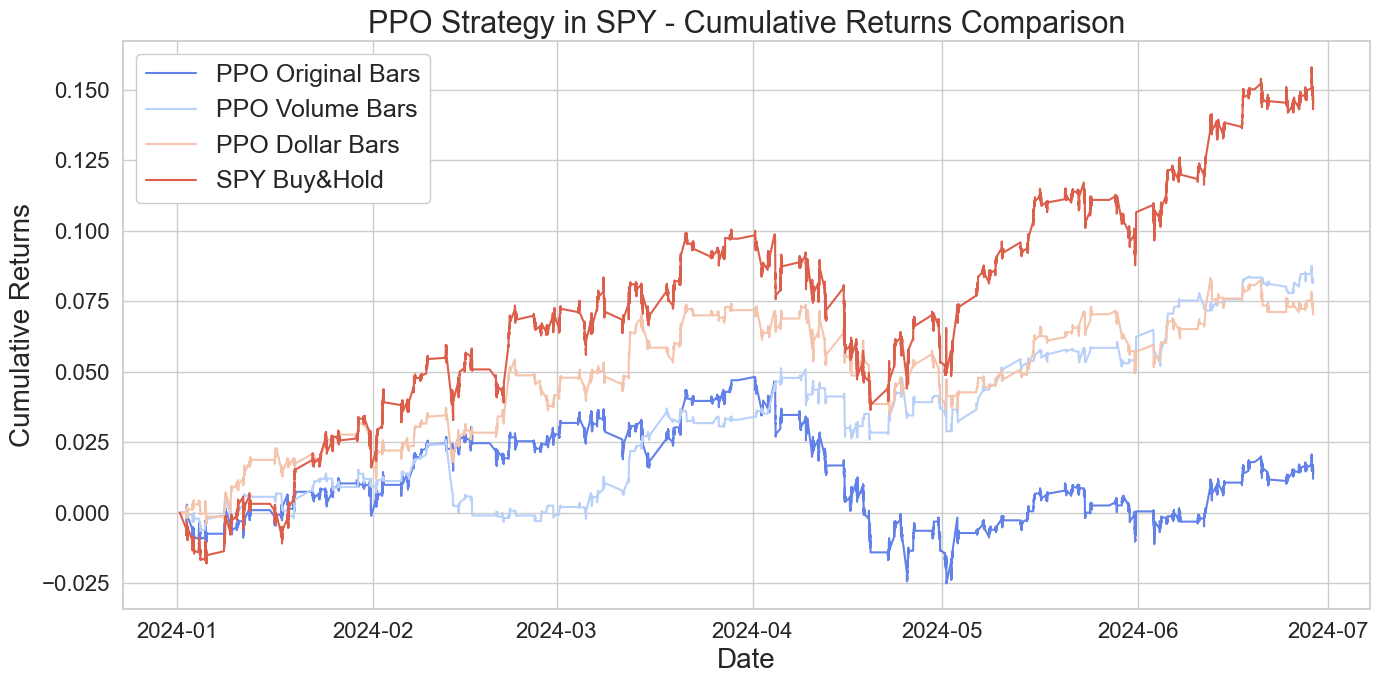

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

filename = 'ppo_spy_strategy_comparison'

# Datos ficticios (debes sustituir esto con tus datos reales)
spy_dollar_ret = SPY_DOLLAR_RET['SPY_real_actions_returns']
spy_volume_ret = SPY_VOLUME_RET['SPY_real_actions_returns']
spy_original_ret = SPY_ORIGINAL_RET['SPY_real_actions_returns']
benchmark_returns = SPY_ORIGINAL_RET['SPY Buy&Hold']

# Calcular el "cumulative returns" de las estrategias y del benchmark
cumulative_returns_strategy1 = (1 + spy_volume_ret).cumprod() - 1
cumulative_returns_strategy2 = (1 + spy_original_ret).cumprod() - 1
cumulative_returns_strategy3 = (1 + spy_dollar_ret).cumprod() - 1
cumulative_returns_benchmark = (1 + benchmark_returns).cumprod() - 1

sns.set(style="whitegrid")
palette = sns.color_palette("coolwarm", 7) 

# Crear figura con tamaño específico
plt.figure(figsize=(14, 7))

# Graficar con colores vibrantes
plt.plot(cumulative_returns_strategy2, label='PPO Original Bars', color=palette[0])
plt.plot(cumulative_returns_strategy1, label='PPO Volume Bars', color=palette[2])
plt.plot(cumulative_returns_strategy3, label='PPO Dollar Bars', color=palette[4])
plt.plot(cumulative_returns_benchmark, label='SPY Buy&Hold', color=palette[6])

# Controlar el tamaño de las letras
plt.title('PPO Strategy in SPY - Cumulative Returns Comparison', fontsize=22)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Cumulative Returns', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Configurar leyenda con fondo opaco
plt.legend(fontsize=18, loc='upper left', frameon=True, facecolor='white', framealpha=1)


plt.tight_layout()
plt.savefig('../tfm/figures/' + filename + '.png')
plt.show()

In [9]:
# Calculando estadísticas para cada estrategia y el benchmark
benchmark_stats = calculate_statistics(benchmark_returns, benchmark_returns)
ppo_original_stats = calculate_statistics(spy_original_ret, benchmark_returns)
ppo_volume_stats = calculate_statistics(spy_volume_ret, SPY_VOLUME_RET['SPY Buy&Hold'])
ppo_dollar_stats = calculate_statistics(spy_dollar_ret, SPY_DOLLAR_RET['SPY Buy&Hold'])

# Creando un DataFrame para mostrar las estadísticas
stats_df = pd.DataFrame({
    'Benchmark (S&P 500)': benchmark_stats,
    'PPO Original Bars': ppo_original_stats,
    'PPO Volume Bars': ppo_volume_stats,
    'PPO Dollar Bars': ppo_dollar_stats
})

# Transponer el DataFrame para una mejor visualización
stats_df = stats_df.T
stats_df = stats_df.applymap(lambda x: round(x, 3))
stats_df

,Cumulative Returns,Annualized Return,Sharpe Ratio,Sortino Ratio,Maximum Drawdown,Calmar Ratio,Value at Risk (VaR),Alpha,Beta
Benchmark (S&P 500),0.146,0.211,0.130,0.186,-0.058,3.626,-0.001,0.000,1.000
PPO Original Bars,0.015,0.021,0.019,0.028,-0.070,0.295,-0.000,-0.000,0.632
PPO Volume Bars,0.082,0.118,0.473,0.655,-0.028,4.168,-0.001,0.002,0.356
PPO Dollar Bars,0.072,0.103,0.219,0.310,-0.037,2.812,-0.001,-0.000,0.545


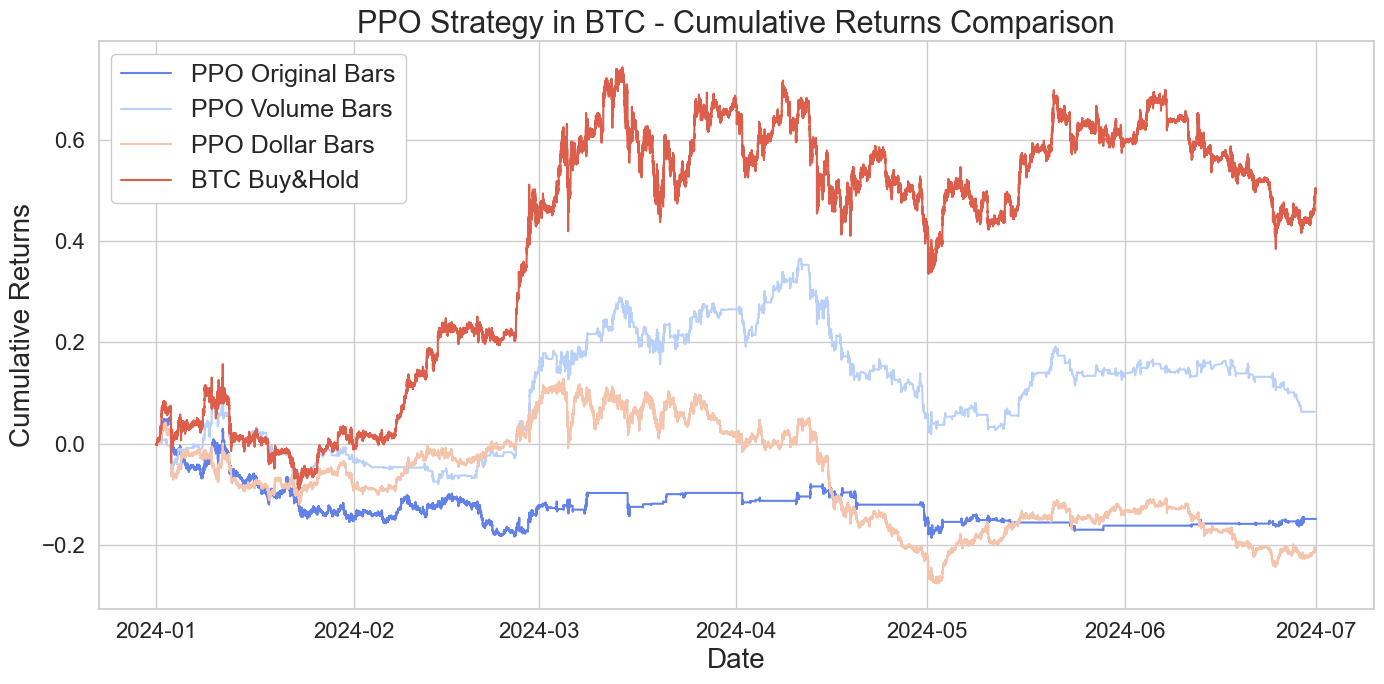

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

filename = 'ppo_btc_strategy_comparison'

# Datos ficticios (debes sustituir esto con tus datos reales)
btc_dollar_ret = BTC_DOLLAR_RET['BTC_real_actions_returns']
btc_volume_ret = BTC_VOLUME_RET['BTC_real_actions_returns']
btc_original_ret = BTC_ORIGINAL_RET['BTC_real_actions_returns']
benchmark_returns = BTC_ORIGINAL_RET['BTC Buy&Hold']

# Calcular el "cumulative returns" de las estrategias y del benchmark
cumulative_returns_strategy1 = (1 + btc_volume_ret).cumprod() - 1
cumulative_returns_strategy2 = (1 + btc_original_ret).cumprod() - 1
cumulative_returns_strategy3 = (1 + btc_dollar_ret).cumprod() - 1
cumulative_returns_benchmark = (1 + benchmark_returns).cumprod() - 1

sns.set(style="whitegrid")
palette = sns.color_palette("coolwarm", 7) 

# Crear figura con tamaño específico
plt.figure(figsize=(14, 7))

# Graficar con colores vibrantes
plt.plot(cumulative_returns_strategy2, label='PPO Original Bars', color=palette[0])
plt.plot(cumulative_returns_strategy1, label='PPO Volume Bars', color=palette[2])
plt.plot(cumulative_returns_strategy3, label='PPO Dollar Bars', color=palette[4])
plt.plot(cumulative_returns_benchmark, label='BTC Buy&Hold', color=palette[6])

# Controlar el tamaño de las letras
plt.title('PPO Strategy in BTC - Cumulative Returns Comparison', fontsize=22)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Cumulative Returns', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Configurar leyenda con fondo opaco
plt.legend(fontsize=18, loc='upper left', frameon=True, facecolor='white', framealpha=1)

plt.tight_layout()
plt.savefig('../tfm/figures/' + filename + '.png')
plt.show()


In [5]:
# Calculando estadísticas para cada estrategia y el benchmark
benchmark_stats = calculate_statistics(benchmark_returns, benchmark_returns)
ppo_original_stats = calculate_statistics(btc_original_ret, benchmark_returns)
ppo_volume_stats = calculate_statistics(btc_volume_ret, BTC_VOLUME_RET['BTC Buy&Hold'])
ppo_dollar_stats = calculate_statistics(btc_dollar_ret, BTC_DOLLAR_RET['BTC Buy&Hold'])

# Creando un DataFrame para mostrar las estadísticas
stats_df = pd.DataFrame({
    'Benchmark (BTC)': benchmark_stats,
    'PPO Original Bars': ppo_original_stats,
    'PPO Volume Bars': ppo_volume_stats,
    'PPO Dollar Bars': ppo_dollar_stats
})

# Transponer el DataFrame para una mejor visualización
stats_df = stats_df.T
stats_df = stats_df.applymap(lambda x: round(x, 3))
stats_df

,Cumulative Returns,Annualized Return,Sharpe Ratio,Sortino Ratio,Maximum Drawdown,Calmar Ratio,Value at Risk (VaR),Alpha,Beta
Benchmark (BTC),0.497,0.753,0.034,0.048,-0.234,3.216,-0.001,0.000,1.000
PPO Original Bars,-0.148,-0.200,-0.020,-0.028,-0.226,-0.888,-0.001,-0.000,0.209
PPO Volume Bars,0.063,0.089,0.054,0.075,-0.254,0.351,-0.004,-0.002,0.415
PPO Dollar Bars,-0.213,-0.284,-0.025,-0.034,-0.358,-0.793,-0.001,-0.001,0.484
